In [3]:
cp ../lamaml/tb_to_df.py .

In [108]:
import os
import json
from tb_to_df import convert_tb_data

root_dir = 'ray_results'

df = convert_tb_data(root_dir)


def extract_params(root):
    if '/runs/' in root:
        root = root.split('/runs/')[0]
        
    params_json_path = os.path.join(root, 'params.json')
    
    with open(params_json_path) as f:
        p = json.load(f)
    
    return p['lr'], p['optimizer'], p['seed'], p['eps']


df['lr'], df['optimizer'],df['seed'], df['eps'] = zip(*df['root'].map(extract_params))


df['optimizer'][df['root'].str.contains('all_adam')] = 'adam'

/var/folders/zv/4cyrx5t92tj9_2dlxh6wjnvw0000gp/T/ipykernel_22368/739739818.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['optimizer'][df['root'].str.contains('all_adam')] = 'adam'


array(['ray/tune/val_loss', 'ray/tune/val_re', 'ray/tune/val_kl',
       'ray/tune/time_this_iter_s', 'ray/tune/done',
       'ray/tune/time_since_restore', 'ray/tune/timesteps_since_restore',
       'ray/tune/iterations_since_restore', 'ray/tune/warmup_time',
       '_hparams_/experiment', '_hparams_/session_start_info',
       '_hparams_/session_end_info', 'Loss/train', 'Loss/train_re',
       'Loss/train_kl', 'Loss/val', 'Loss/val_re', 'Loss/val_kl',
       'Loss/val_ndcg'], dtype=object)

In [69]:
df.query('name == "Loss/val_ndcg"').query('optimizer == "adam"')

,wall_time,name,step,value,root,lr,optimizer,seed,eps
45295,1.673957e+09,Loss/val_ndcg,1.0,89.446579,ray_results/all_adam/tune_with_parameters_4750...,0.000006,adam,100,0.0001
45302,1.673958e+09,Loss/val_ndcg,2.0,226.486633,ray_results/all_adam/tune_with_parameters_4750...,0.000006,adam,100,0.0001
45309,1.673958e+09,Loss/val_ndcg,3.0,192.011200,ray_results/all_adam/tune_with_parameters_4750...,0.000006,adam,100,0.0001
45316,1.673958e+09,Loss/val_ndcg,4.0,180.407883,ray_results/all_adam/tune_with_parameters_4750...,0.000006,adam,100,0.0001
45323,1.673958e+09,Loss/val_ndcg,5.0,172.068329,ray_results/all_adam/tune_with_parameters_4750...,0.000006,adam,100,0.0001
...,...,...,...,...,...,...,...,...,...
56162,1.673965e+09,Loss/val_ndcg,85.0,46.538887,ray_results/all_adam/tune_with_parameters_4750...,0.000025,adam,100,0.0001
56169,1.673966e+09,Loss/val_ndcg,86.0,46.466675,ray_results/all_adam/tune_with_parameters_4750...,0.000025,adam,100,0.0001
56176,1.673966e+09,Loss/val_ndcg,87.0,45.644066,ray_results/all_adam/tune_with_parameters_4750...,0.000025,adam,100,0.0001
56183,1.673966e+09,Loss/val_ndcg,88.0,45.693836,ray_results/all_adam/tune_with_parameters_4750...,0.000025,adam,100,0.0001


In [89]:
best_val

238.21372985839844

Loss/val
    krad, best lr = 0.0002
    adam_normgrad, best lr = 2.5e-05
    shampoo, best lr = 0.0002
    sgd, best lr = 0.0002
    kradmm, best lr = 0.0002
    adam, best lr = 2.5e-05


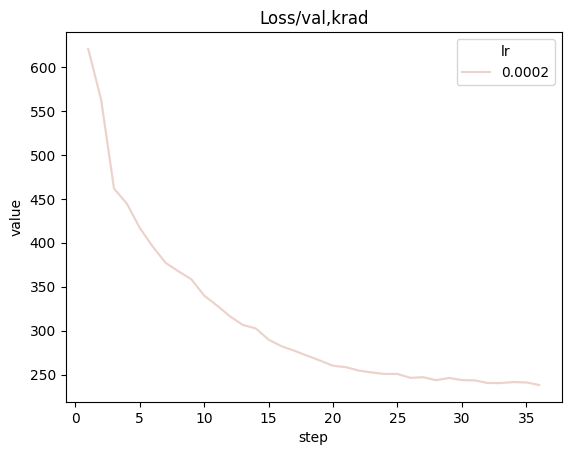

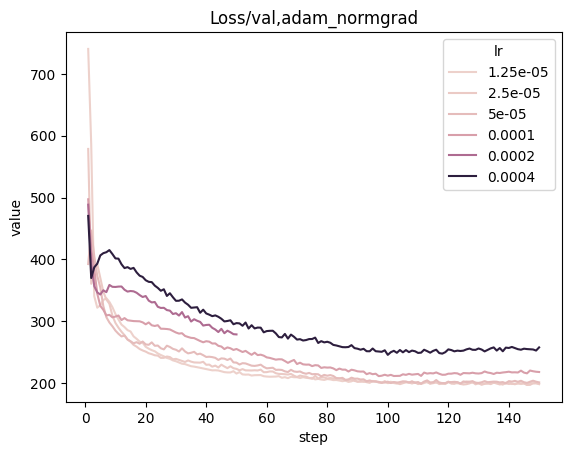

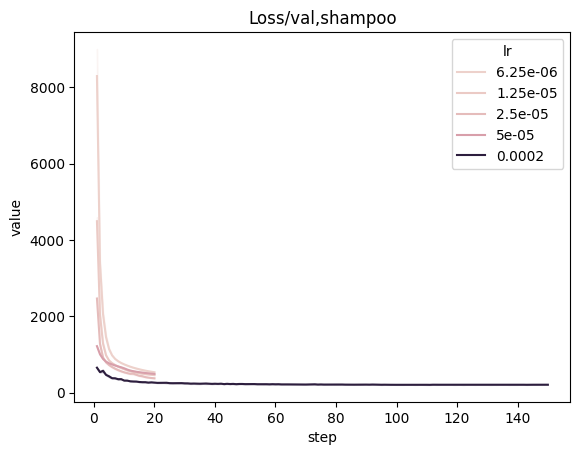

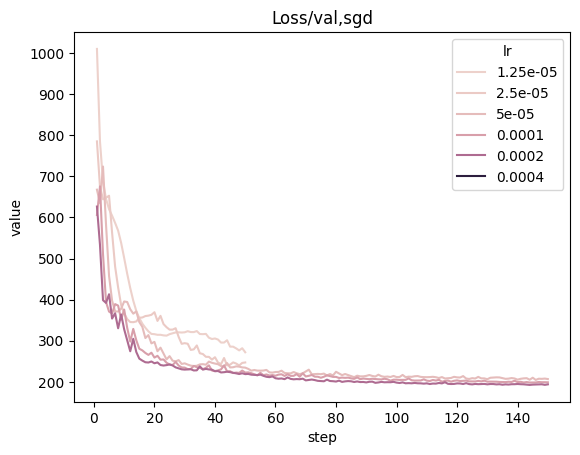

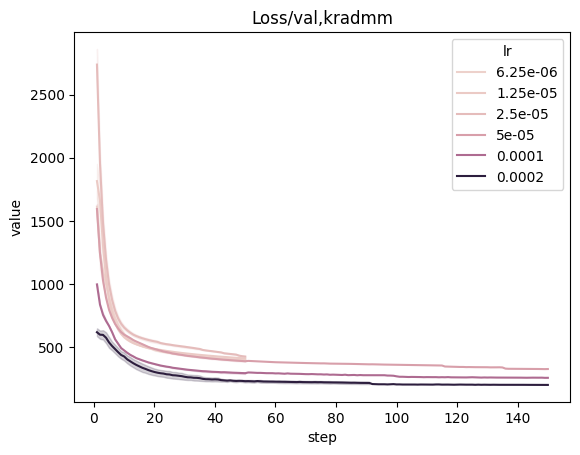

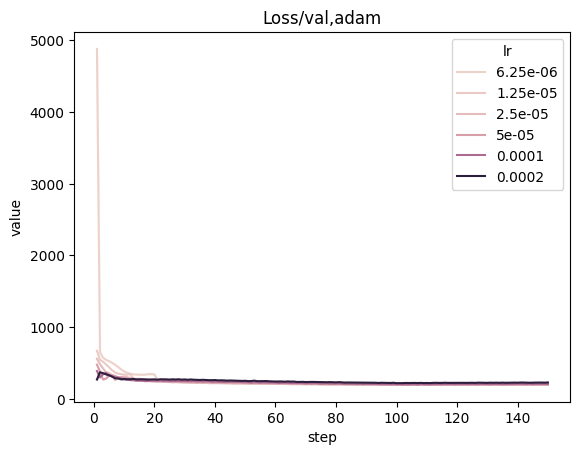

In [112]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


best_lrs = {}
best_epochs = {}
best_vals = {}
best_seeds = {}

for curve in ['Loss/val']:
    print(curve)
    for opt in df.optimizer.unique():
    

        df_plot = df.query(f'optimizer == "{opt}" ').query(f'name == "{curve}"')
        plt.figure(), sns.lineplot(df_plot, x='step',y='value',hue='lr'), plt.title(curve+','+opt)
        
        df_ag=df_plot.groupby(['step','lr']).agg('min').reset_index()
        min_val = df_ag[df_ag.value == df_ag.value.min()]
        best_lr= min_val.lr.values[0]
        best_step = min_val.step.values[0]
        best_val = min_val.value.values[0]
        best_seed = min_val.seed.values[0]
        
        print(f"    {opt}, best lr = {best_lr}")
        best_lrs[opt]=best_lr
        best_epochs[opt] = best_step
        best_vals[opt] = best_val
        best_seeds[opt] = best_seed


In [103]:
from pprint import pprint
pprint(best_lrs)
pprint(best_epochs)
pprint(best_vals)
pprint(best_seeds)

{'adam': 2.5e-05,
 'adam_normgrad': 2.5e-05,
 'krad': 0.0002,
 'kradmm': 0.0002,
 'sgd': 0.0002,
 'shampoo': 0.0002}
{'adam': 136.0,
 'adam_normgrad': 146.0,
 'krad': 36.0,
 'kradmm': 150.0,
 'sgd': 144.0,
 'shampoo': 111.0}
{'adam': 194.18649291992188,
 'adam_normgrad': 196.80599975585938,
 'krad': 238.21372985839844,
 'kradmm': 204.00865173339844,
 'sgd': 192.61993408203125,
 'shampoo': 205.36676025390625}
{'adam': 100,
 'adam_normgrad': 100,
 'krad': 100,
 'kradmm': 100,
 'sgd': 100,
 'shampoo': 100}


In [79]:
df.lr.unique()

array([2.00e-04, 4.00e-04, 2.50e-05, 1.25e-05, 5.00e-05, 1.00e-04,
       6.25e-06])

In [81]:
sns.lineplot?

/var/folders/zv/4cyrx5t92tj9_2dlxh6wjnvw0000gp/T/ipykernel_22368/2650108484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['value'][step_series] = df_p['value'][step_series] - float(df_min.value[df_min.step == step])
/var/folders/zv/4cyrx5t92tj9_2dlxh6wjnvw0000gp/T/ipykernel_22368/2650108484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['value'][step_series] = df_p['value'][step_series] - float(df_min.value[df_min.step == step])
/var/folders/zv/4cyrx5t92tj9_2dlxh6wjnvw0000gp/T/ipykernel_22368/2650108484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

/var/folders/zv/4cyrx5t92tj9_2dlxh6wjnvw0000gp/T/ipykernel_22368/2650108484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['value'][step_series] = df_p['value'][step_series] - float(df_min.value[df_min.step == step])
/var/folders/zv/4cyrx5t92tj9_2dlxh6wjnvw0000gp/T/ipykernel_22368/2650108484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['value'][step_series] = df_p['value'][step_series] - float(df_min.value[df_min.step == step])
/var/folders/zv/4cyrx5t92tj9_2dlxh6wjnvw0000gp/T/ipykernel_22368/2650108484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

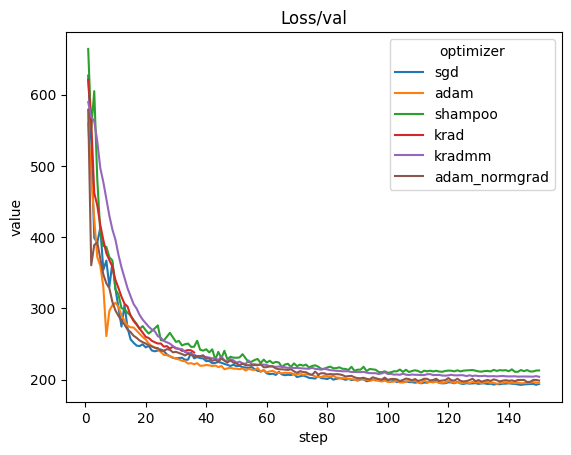

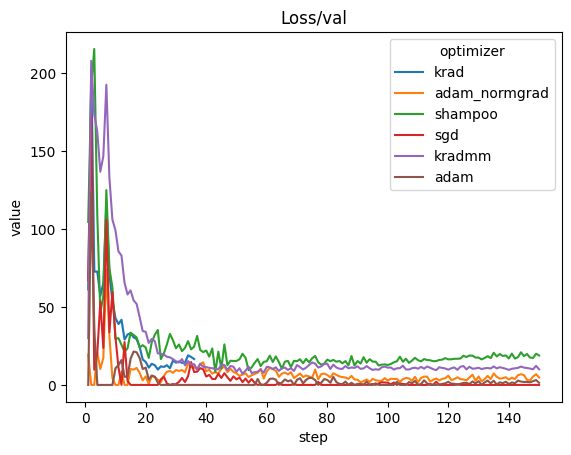

In [107]:
import pandas as pd

df_list = []

for opt,lr in best_lrs.items():
    df_list.append(df.query(f'optimizer == "{opt}"').query(f'lr == {lr}').query('seed == 100'))
    
df_plot = pd.concat(df_list)

hue_order = ['sgd','adam','shampoo','krad','kradmm','adam_normgrad']

for curve in ['Loss/val']:
# for curve in df_plot.name.unique():
    if 'ray' in curve:
        continue
    if 'hparams' in curve:
        continue
    
    df_p = df_plot.query(f'name == "{curve}"')
    
    df_min = df_p.groupby(['step']).agg('min').reset_index()
    
    
    
    plt.figure(), sns.lineplot(df_p, x='step',y='value', hue = 'optimizer', hue_order=hue_order, errorbar=None), plt.title(curve)
#     plt.ylim([190,300])
    
    for step in df_min.step.unique():
        step_series = df_p.step == step
        df_p['value'][step_series] = df_p['value'][step_series] - float(df_min.value[df_min.step == step])
    
    plt.figure(), sns.lineplot(df_p, x='step',y='value', hue = 'optimizer'), plt.title(curve)
    
    

/tmp/ipykernel_3921550/2277816222.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_best = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()


,optimizer,value
0,adam,0.833498
1,krad,0.830442
2,kradmm,0.840525
3,sgd,0.839025
4,shampoo,0.835048


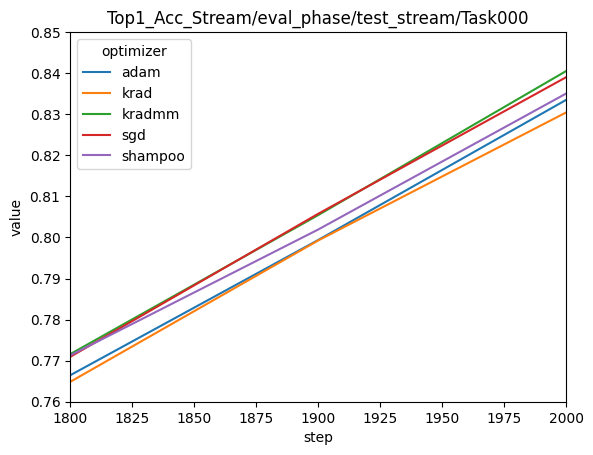

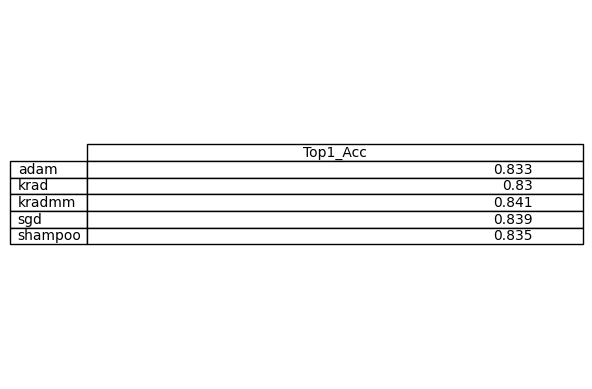

In [209]:
#Test stream final performance

curve = 'Top1_Acc_Stream/eval_phase/test_stream/Task000'
df_best = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()

plt.figure(), sns.lineplot(df_best, x='step',y='value', hue = 'optimizer'), plt.title(curve),
plt.xlim([1800,2000]), plt.ylim([.76,.85])

df_bs=df_best.query('step == 2000')

plt.figure(), plt.table(cellText=[[round(x,3)] for x in df_bs.value.to_list()], colLabels=['Top1_Acc'], loc='center',rowLabels=df_bs.optimizer.to_list())
plt.axis('off')

df_bs[['optimizer','value']].reset_index(drop=True)
    

In [226]:
pd.DataFrame?

/tmp/ipykernel_3921550/1090476159.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()
/tmp/ipykernel_3921550/1090476159.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()
/tmp/ipykernel_3921550/1090476159.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only column

,E00,E01,E02,E03,E04,E05,E06,E07,E08,E09,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19
adam,0.838,0.836,0.844,0.838,0.839,0.841,0.847,0.840,0.840,0.843,0.841,0.837,0.839,0.838,0.836,0.836,0.836,0.827,0.819,0.754
krad,0.835,0.833,0.833,0.838,0.838,0.832,0.839,0.843,0.843,0.839,0.839,0.844,0.846,0.838,0.833,0.840,0.841,0.836,0.814,0.704
kradmm,0.829,0.841,0.831,0.843,0.838,0.839,0.841,0.840,0.846,0.851,0.847,0.849,0.844,0.849,0.846,0.844,0.847,0.848,0.838,0.799
sgd,0.827,0.834,0.837,0.822,0.836,0.838,0.835,0.845,0.840,0.842,0.846,0.852,0.850,0.847,0.851,0.847,0.842,0.845,0.840,0.801
shampoo,0.837,0.840,0.837,0.832,0.839,0.842,0.838,0.846,0.840,0.838,0.844,0.843,0.839,0.844,0.853,0.846,0.846,0.843,0.840,0.716


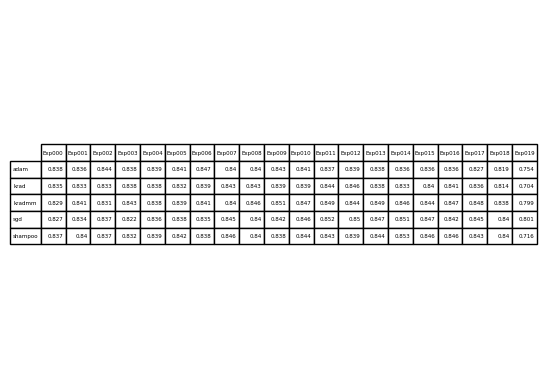

In [248]:
import numpy as np

# final performance per experience
table_columns = []
col_labels = []
row_labels = []
for curve in df_plot.name.unique():
    if 'ray' in curve:
        continue
    if 'hparams' in curve:
        continue
    exp = curve.split('/')[-1]
    
    if 'Task' in exp:
        continue
        
    df_mean = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()

#     plt.figure(), sns.lineplot(df_mean, x='step',y='value', hue = 'optimizer'), plt.title(curve),
#     plt.xlim([1800,2000])

    df_final=df_mean.query('step == 2000')
    
    table_columns.append(df_final.value.to_list())
    col_labels.append(curve.split('/')[-1])
    row_labels.append(df_final.optimizer.to_list())


table_columns = np.transpose(table_columns)


plt.figure(), plt.table(cellText=np.round(table_columns,3), colLabels=col_labels, loc='center',rowLabels=row_labels[0], fontsize=100.0)
plt.axis('off')

df_exp = pd.DataFrame(data=np.round(table_columns,3), index = row_labels[0], columns = ['E'+x[-2::] for x in col_labels])
df_exp

# plt.figure(), plt.table(cellText=[[round(x,3)] for x in df_bs.value.to_list()], colLabels=['Top1_Acc'], loc='center',rowLabels=df_bs.optimizer.to_list())
# plt.axis('off')

# df_bs[['optimizer','value']].reset_index(drop=True)

In [242]:
plt.table?

In [158]:
df_p.groupby(['step']).agg('min').reset_index()

,step,wall_time,name,value,eps,lr,optimizer,seed
0,100.0,1.673320e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.149635,0.0000,0.0010,adam,100
1,200.0,1.673320e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.190635,0.0000,0.0010,adam,100
2,300.0,1.673320e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.221850,0.0000,0.0010,adam,100
3,400.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.260720,0.0000,0.0010,adam,100
4,500.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.296390,0.0000,0.0010,adam,100
5,600.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.331040,0.0000,0.0010,adam,100
6,700.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.358435,0.0000,0.0010,adam,100
7,800.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.403420,0.0000,0.0010,adam,100
8,900.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.435930,0.0000,0.0010,adam,100
9,1000.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.475215,0.0000,0.0010,adam,100


In [176]:
sns.lineplot?